In [1]:
from skimage import io, filters
from scipy.ndimage import gaussian_filter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

Accuracy: 0.89
Recall: 0.86
Precision: 0.37
F1 Score: 0.52


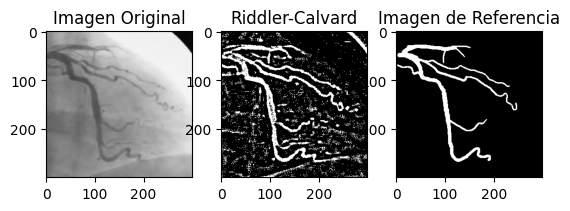

In [3]:
def riddler_calvard_binarization(img, window_size):
    # Aplicar filtro gaussiano a la imagen para suavizarla
    img_smoothed = gaussian_filter(img, sigma=2)

    # Aplicar el algoritmo de Riddler-Calvard
    threshold_img = filters.threshold_local(img_smoothed, window_size, method='mean', mode='reflect')

    # Binarizar la imagen usando el umbral local
    binary_image = img_smoothed <= threshold_img - 0.5

    return binary_image

image_path = 'database/20.pgm'
img = io.imread(image_path)
imgRef_path = 'database/20_gt.pgm'
imgRef = io.imread(imgRef_path)

# Verificar si la lectura de la imagen fue exitosa
if img is not None and imgRef is not None:
    # Asegurar de que las imágenes tengan el mismo formato
    imgRef = imgRef.astype(bool)
    
    # filtro gaussiano
    binary_result = riddler_calvard_binarization(img, window_size=5) 

    accuracy = accuracy_score(imgRef.flatten(), binary_result.flatten())
    recall = recall_score(imgRef.flatten(), binary_result.flatten())
    precision = precision_score(imgRef.flatten(), binary_result.flatten())
    f1 = f1_score(imgRef.flatten(), binary_result.flatten())

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_result, cmap='gray')
    plt.title('Riddler-Calvard')

    plt.subplot(1, 3, 3)
    plt.imshow(imgRef, cmap='gray')
    plt.title('Imagen de Referencia')

    plt.show()
else:
    print("Error al cargar la imagen.")
